In [ ]:
1. https://www.kaggle.com/datasets/nasa/meteorite-landings/

In [ ]:
2. Этот набор данных включает местоположение, массу, состав и год падения более 45000 метеоритов, упавших на нашу планету.

In [ ]:
2a) Предметная область: астрономия, метеоритика
    Источник данных: наблюдения, отчеты об обнаружении метеоритов
    Характер данных: реальные

In [ ]:
2b) Атрибуты дата сета:

In [28]:
import numpy as np
import pandas as pd
df = pd.read_csv('meteorite-landings.csv')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [8]:
for column in ds.columns:
    print(column)

name
id
nametype
recclass
mass
fall
year
reclat
reclong
GeoLocation


In [ ]:
name - название метеорита (строковый тип данных)
id - уникальный номер (числовой тип данных)
nametype - тип названия (valid - обычный метеорит/relict - метеорит, сильно разрушенный погодными условиями на Земле) (строковый тип данных)
recclass - класс метеорита (строковый тип данных)
mass - масса метеорита в граммах (числовой тип данных)
fall - падение метеорита (fell - падение наблюдалось/ found - был найден после падения) (строковый тип данных)
year - год падения/обнаружения (числовой тип данных)
reclat - широта падерия метеорита (числовой тип данных)
reclong - долгота падения метеорита (числовой тип данных)
GeoLocation - геолокация (строковый тип данных)

In [ ]:
2c) Описание задачи анализа:
    1)чем географическое распределение наблюдаемых падений отличается от географического распределения найденных метеоритов?
        -- это было бы здорово наложить на картограмму или рядом с картой плотности населения высокого разрешения
    2)существуют ли какие-либо географические различия или разности во времени в классе метеоритов, упавших на Землю?

In [ ]:
3) 
Этот пункт буду выаолнять только со следующими атрибутами: mass, year, reclat, reclong
Для работы создам новый дата фрейм numdf, который будет включать в себя только эти атрибуты.

In [32]:
numdf = df[['mass', 'year', 'reclat', 'reclong']]
numdf.head()

,mass,year,reclat,reclong
0,21.0,1880.0,50.77500,6.08333
1,720.0,1951.0,56.18333,10.23333
2,107000.0,1952.0,54.21667,-113.00000
3,1914.0,1976.0,16.88333,-99.90000
4,780.0,1902.0,-33.16667,-64.95000


In [ ]:
3a) Определить среднее значение, СКО.

In [41]:
means = numdf.mean()
stds = numdf.std()
print('Среднее занчение для каждого атрибута:')
i = 0
for column in numdf.columns:
    print(column, ': ', means[i])
    i = i+1
print('')
print('СКО для каждого атрибута:')
i = 0
for column in numdf.columns:
    print(column, ': ', stds[i])
    i = i+1

Среднее занчение для каждого атрибута:
mass :  13278.078548601516
year :  1991.7721889583518
reclat :  -39.12258031142418
reclong :  61.07431852623629

СКО для каждого атрибута:
mass :  574988.8764104699
year :  27.181247276035737
reclat :  46.37851135669297
reclong :  80.64729807906366


In [ ]:
3b) построить гистограмму распределения значений, определить есть ли выбросы

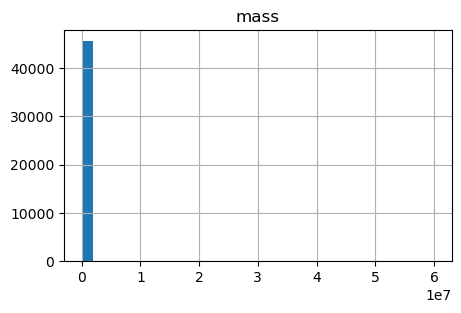

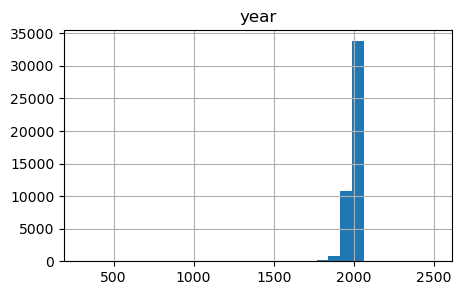

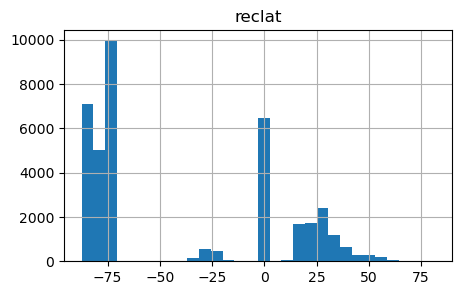

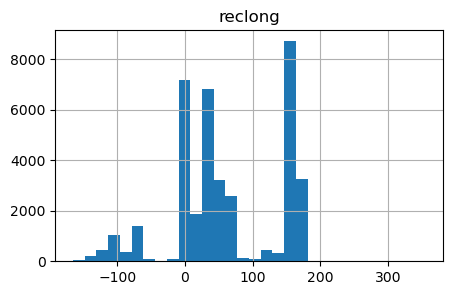

In [51]:
#! pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
for column in numdf.columns:
    plt.figure(figsize=(5,3))
    plt.hist(numdf[column], bins=30)
    plt.grid(True)
    plt.title(column)

In [ ]:
Определим выбросы:

In [52]:
for column in numdf.columns:
    q1=numdf[column].quantile(0.25)
    q3=numdf[column].quantile(0.75)
    IQR=q3-q1
    outliers = numdf[column][((df[column]<(q1-1.5*IQR)) | (numdf[column]>(q3+1.5*IQR)))]
    print(f"Количество выбросов в {column} : {str(len(outliers))}")

Количество выбросов в mass : 7086
Количество выбросов в year : 1994
Количество выбросов в reclat : 0
Количество выбросов в reclong : 0


In [ ]:
3с) есть ли пропущенные значение, сколько

In [61]:
missing_values = numdf.isnull()
num_missing_values = missing_values.sum()
print("Количество пропущенных значений:")
i=0
for column in numdf.columns:
    print(f"{column}: {num_missing_values[i]}")
    i += 1

Количество пропущенных значений:
mass: 131
year: 288
reclat: 7315
reclong: 7315


In [ ]:
3d)предложить вариант обработки пропущенных значений

In [ ]:
Обработка пропщуенных значений в мойм дата сете зависит от задачи анализа.
Например, обработка может осуществялться методом заменой средним или заменой медианой.

In [ ]:
4.Определить корреляцию между параметрами

In [ ]:
4а)какие атрибуты высококоррелированы, определить характер корреляции 

In [63]:
corr = numdf.corr()
print(corr)

             mass      year    reclat   reclong
mass     1.000000 -0.116569  0.029087 -0.021860
year    -0.116569  1.000000 -0.105277  0.085706
reclat   0.029087 -0.105277  1.000000 -0.591539
reclong -0.021860  0.085706 -0.591539  1.000000


In [ ]:
corr - корреляционная матрица, в которой на пересечении столбцов и строк указан коэффициэнт корреляции.
Корреляция тем выше, чем больше коэфиициент корреляции удаляется от нуля.
По моей матрице корреляции видно, что высококоррелированые атрибуты это reclong c reclat со значением -0,591539.

In [ ]:
Для определения характера корреляции между атрибутами можно рассчитать коэффициент корреляции Пирсона. Он принимает значения от -1 до 1, где 1 означает полную прямую корреляцию, 0 - отсутствие корреляции, а -1 - полную обратную корреляцию.

In [ ]:
4b) какие атрибуты не имеют корреляцию

In [ ]:
Атрибуты без корреляции - это такие атрибуты, между которыми нет линейной зависимости. 
В корреляционной матрице значения этих атрибутов близки к нулю.

In [ ]:
4с) постройте графики рассеивания (предпочтительнее матрицу графиков рассеивания)

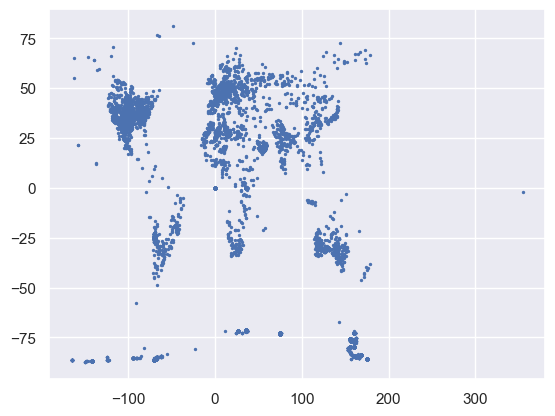

In [86]:
plt.scatter(numdf.reclong, numdf.reclat, s = 2)

In [ ]:
Матрица всех графиков рассеивания:

array([[<Axes: xlabel='mass', ylabel='mass'>,
        <Axes: xlabel='year', ylabel='mass'>,
        <Axes: xlabel='reclat', ylabel='mass'>,
        <Axes: xlabel='reclong', ylabel='mass'>],
       [<Axes: xlabel='mass', ylabel='year'>,
        <Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='reclat', ylabel='year'>,
        <Axes: xlabel='reclong', ylabel='year'>],
       [<Axes: xlabel='mass', ylabel='reclat'>,
        <Axes: xlabel='year', ylabel='reclat'>,
        <Axes: xlabel='reclat', ylabel='reclat'>,
        <Axes: xlabel='reclong', ylabel='reclat'>],
       [<Axes: xlabel='mass', ylabel='reclong'>,
        <Axes: xlabel='year', ylabel='reclong'>,
        <Axes: xlabel='reclat', ylabel='reclong'>,
        <Axes: xlabel='reclong', ylabel='reclong'>]], dtype=object)

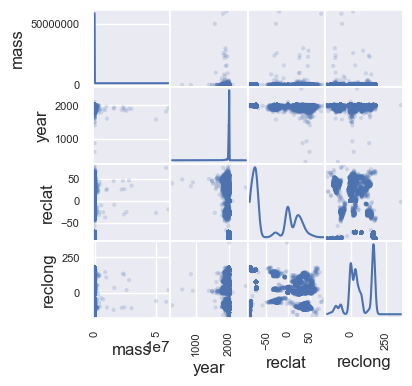

In [101]:
from pandas.plotting import scatter_matrix
scatter_matrix(numdf, alpha = 0.2, figsize = (4, 4), diagonal = 'kde')

In [ ]:
4d) проанализируйте полученные результаты

In [ ]:
Матрица графиков рассеивания позволяет визуально оценить наличие и характер корреляции между различными признаками.
Если точки на графике хорошо ложатся на прямую линию с наклоном 1 (т.е. y = x), это говорит о наличии сильной прямой корреляции между признаками. Если же точки ложатся на линию с наклоном -1 (т.е. y = -x), это говорит о сильной обратной корреляции. Если точки распределены хаотично, это говорит об отсутствии корреляции между признаками.

In [ ]:
По моей матрице графиков рассеивания можно понять, что между атрибутами отсутвует корреляция.